In [20]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
    ERROR: Command errored out with exit status 1:
     command: /Library/Developer/CommandLineTools/usr/bin/python3 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/mb/p_xb9j714yd6pzqdp789hrsr0000gn/T/pip-install-1l9m9xff/sklearn_6518249b08524ed5be16a353415a9d73/setup.py'"'"'; __file__='"'"'/private/var/folders/mb/p_xb9j714yd6pzqdp789hrsr0000gn/T/pip-install-1l9m9xff/sklearn_6518249b08524ed5be16a353415a9d73/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/mb/p_xb9j714yd6pzqdp789hrsr0000gn/T/pip-pip-egg-info-_ompiy9z
         cwd: /private/var/folders/mb/p_xb9j714yd6pzqdp789hrsr0000gn/T/pip-install-1l9m9xff/sklea

In [28]:
import pandas as pd
from IPython.display import display
df = pd.read_csv('Earthquake_Data.csv', delimiter = r'\s+')
display(df)

,Date(YYYY/MM/DD),Time,Latitude,Longitude,Depth,Mag,Magt,Nst,Gap,Clo,RMS,SRC,EventID
0,1966/07/01,09:41:21.82,35.9463,-120.4700,12.26,3.20,Mx,7,171,20,0.02,NCSN,-4540462
1,1966/07/02,12:08:34.25,35.7867,-120.3265,8.99,3.70,Mx,8,86,3,0.04,NCSN,-4540520
2,1966/07/02,12:16:14.95,35.7928,-120.3353,9.88,3.40,Mx,8,89,2,0.03,NCSN,-4540521
3,1966/07/02,12:25:06.12,35.7970,-120.3282,9.09,3.10,Mx,8,101,3,0.08,NCSN,-4540522
4,1966/07/05,18:54:54.36,35.9223,-120.4585,7.86,3.10,Mx,9,161,14,0.04,NCSN,-4540594
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18025,2007/12/19,12:14:09.62,34.1438,-116.9822,7.03,4.06,ML,10,73,14,0.08,NCSN,40207706
18026,2007/12/21,12:14:56.45,37.3078,-121.6735,8.47,3.08,ML,114,45,5,0.12,NCSN,51192926
18027,2007/12/23,21:43:43.54,37.2127,-117.8230,10.00,3.54,ML,45,176,40,0.07,NCSN,51193070
18028,2007/12/28,01:59:42.40,36.5292,-121.1133,5.99,3.04,ML,70,45,4,0.06,NCSN,51193343


Preprocessing

In [29]:
new_column_names = ["Date(YYYY/MM/DD)", "Time(UTC)", "Latitude(deg)","Longitude(deg)","Depth(km)", "Magnitude(ergs)","Magnitude_type", "No.of stations", "Gap", "Close", "RMS", "SRC", "EventID"]
df.columns = new_column_names
ts = pd.to_datetime(df["Date(YYYY/MM/DD)"]+ " " + df["Time(UTC)"])
df = df.drop(["Date(YYYY/MM/DD)", "Time(UTC)"], axis=1)
df.index = ts
display(df)

,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No.of stations,Gap,Close,RMS,SRC,EventID
1966-07-01 09:41:21.820,35.9463,-120.4700,12.26,3.20,Mx,7,171,20,0.02,NCSN,-4540462
1966-07-02 12:08:34.250,35.7867,-120.3265,8.99,3.70,Mx,8,86,3,0.04,NCSN,-4540520
1966-07-02 12:16:14.950,35.7928,-120.3353,9.88,3.40,Mx,8,89,2,0.03,NCSN,-4540521
1966-07-02 12:25:06.120,35.7970,-120.3282,9.09,3.10,Mx,8,101,3,0.08,NCSN,-4540522
1966-07-05 18:54:54.360,35.9223,-120.4585,7.86,3.10,Mx,9,161,14,0.04,NCSN,-4540594
...,...,...,...,...,...,...,...,...,...,...,...
2007-12-19 12:14:09.620,34.1438,-116.9822,7.03,4.06,ML,10,73,14,0.08,NCSN,40207706
2007-12-21 12:14:56.450,37.3078,-121.6735,8.47,3.08,ML,114,45,5,0.12,NCSN,51192926
2007-12-23 21:43:43.540,37.2127,-117.8230,10.00,3.54,ML,45,176,40,0.07,NCSN,51193070
2007-12-28 01:59:42.400,36.5292,-121.1133,5.99,3.04,ML,70,45,4,0.06,NCSN,51193343


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18030 entries, 1966-07-01 09:41:21.820000 to 2007-12-28 23:20:28.120000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude(deg)    18030 non-null  float64
 1   Longitude(deg)   18030 non-null  float64
 2   Depth(km)        18030 non-null  float64
 3   Magnitude(ergs)  18030 non-null  float64
 4   Magnitude_type   18030 non-null  object 
 5   No.of stations   18030 non-null  int64  
 6   Gap              18030 non-null  int64  
 7   Close            18030 non-null  int64  
 8   RMS              18030 non-null  float64
 9   SRC              18030 non-null  object 
 10  EventID          18030 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1.7+ MB


In [31]:
file_name = 'Earthquake_data_processed.xlsx'
df.to_excel(file_name)
print('DataFrame is written to excel file successfully.')


DataFrame is written to excel file successfully.


In [32]:
import warnings
warnings.filterwarnings('ignore')


Parition the data into Training and Testing data

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df[['Latitude(deg)','Longitude(deg)', 'Depth(km)', 'No.of stations']]
Y = df['Magnitude(ergs)']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [34]:
from sklearn.metrics import r2_score, mean_squared_error

scores = {"Model name": ["Linear regression", "SVM", "Random Forest"], "mse": [], "R^2": []}
Y_pred = regressor.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print("R^2: {:.2f}, MSE: {:.2f}".format(r2, mse))

R^2: 0.02, MSE: 0.19


In [35]:
# Predict on new data
new_data = [[33.89, -118.40, 16.17, 11], [37.77, -122.42, 8.05, 14]]
new_pred = regressor.predict(new_data)
print("New predictions:", new_pred)

New predictions: [3.447483   3.33027751]


PLOT MULTIPLE LINEAR REGRESSION MODEL

Matplotlib is building the font cache; this may take a moment.


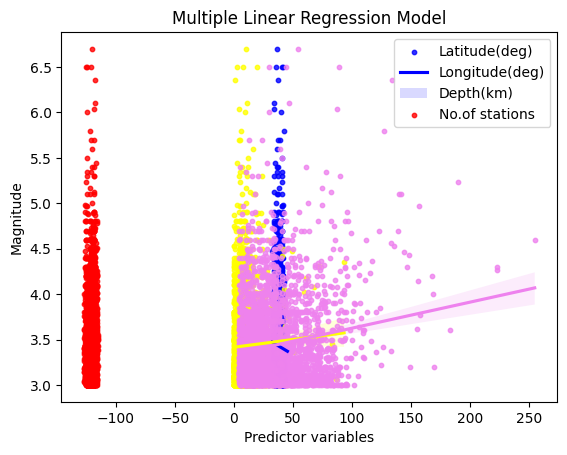

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=X_test['Latitude(deg)'], y=Y_test, color='blue', scatter_kws={'s': 10})
sns.regplot(x=X_test['Longitude(deg)'], y=Y_test, color='red', scatter_kws={'s':10})
sns.regplot(x=X_test['Depth(km)'],y=Y_test, color='yellow', scatter_kws={'s': 10})
sns.regplot(x=X_test['No.of stations'], y = Y_test, color='violet', scatter_kws={'s':10})
plt.legend(labels=['Latitude(deg)','Longitude(deg)','Depth(km)','No.of stations'])
plt.xlabel('Predictor variables')
plt.ylabel('Magnitude')
plt.title('Multiple Linear Regression Model')
plt.show()

SVM

In [40]:
from sklearn.svm import SVR

subset_size = 500
X_train_subset = X_train[:subset_size]
Y_train_subset = Y_train[:subset_size]

# create an SVM model
svm = SVR(kernel='rbf', C =1e3, gamma=0.1)

# Train the SVM model on the subset of data
svm.fit(X_train_subset, Y_train_subset)

score = svm.score(X_test, Y_test)
print("test score:", score)

test score: -2.6279677388415186


In [41]:
y_pred_svm = svm.predict(X_test)
r2_svm = r2_score(Y_test, y_pred_svm)
mse_svm = mean_squared_error(Y_test, y_pred_svm)
scores['mse'].append(mse_svm)
scores['R^2'].append(r2_svm)

print("SVM r2: {:.2f}, MSE: {:.2f}".format(r2_svm, mse_svm))

SVM r2: -2.63, MSE: 0.70


Predict for new data

In [42]:
new_pred_svm = svm.predict(new_data)
print("New SVM predictions:", new_pred_svm)

New SVM predictions: [4.03067981 3.68101639]


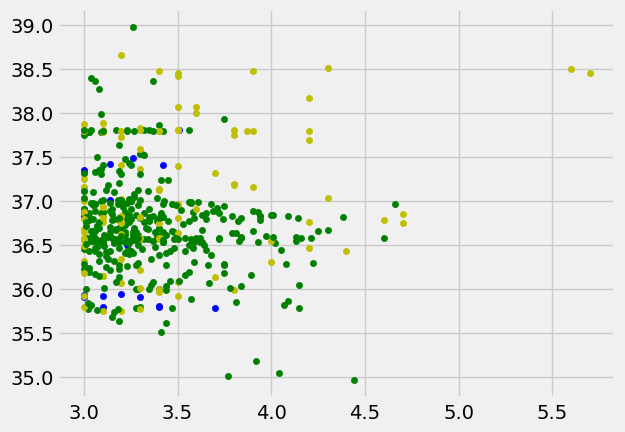

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.svm import SVC

style.use('fivethirtyeight')

def make_meshgrid(x,y,h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

subset_size = 500

features = df[['Magnitude(ergs)', 'Latitude(deg)']][:subset_size].values
classes = df['Magnitude_type'][:subset_size].values

# create 3 svm with rbf kernel
svm1 = SVC(kernel='rbf')
svm2 = SVC(kernel='rbf')
svm3 = SVC(kernel='rbf')

# fit each svm's
svm1.fit(features, (classes =='ML').astype(int))
svm2.fit(features, (classes=='Mx').astype(int))
svm3.fit(features, (classes=='Md').astype(int))

fig, ax = plt.subplots()
X0, X1 = features[:, 0], features[:, 1]
xx, yy = make_meshgrid(X0, X1)

color = ['y','b','g','k','m']
for i in range(subset_size):
    if classes[i] == 'ML':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[0])
    elif classes[i] == 'Mx':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[1])
    elif classes[i] == 'Md':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[2])
    else:
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[4])
plt.show()


RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [46]:
y_pred = rf.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print('Mean squared error:', mse)
print('R2 score:', r2)

Mean squared error: 0.1664367242068774
R2 score: 0.1352477074522037


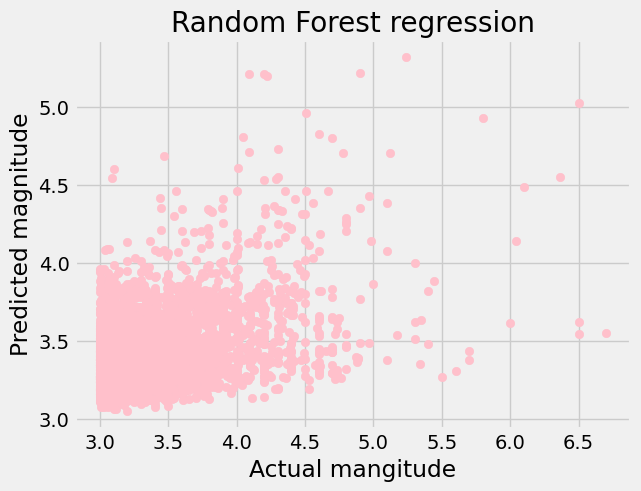

In [47]:
plt.scatter(Y_test, y_pred, color='pink')
plt.xlabel('Actual mangitude')
plt.ylabel('Predicted magnitude')
plt.title('Random Forest regression')
plt.show()

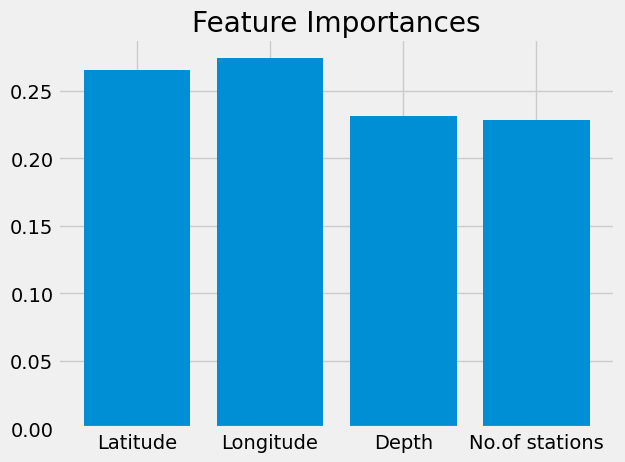

In [48]:
importances = rf.feature_importances_
features = ['Latitude','Longitude','Depth', 'No.of stations']
plt.bar(features, importances)
plt.title('Feature Importances')
plt.show()

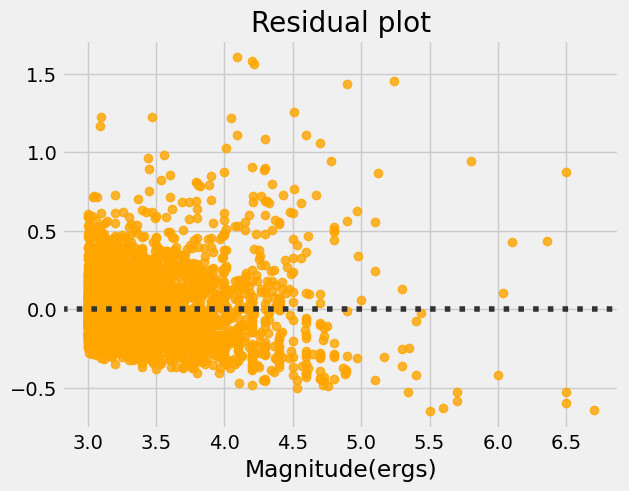

In [49]:
sns.residplot(x = Y_test, y = y_pred, color='orange')
plt.title('Residual plot')
plt.show()

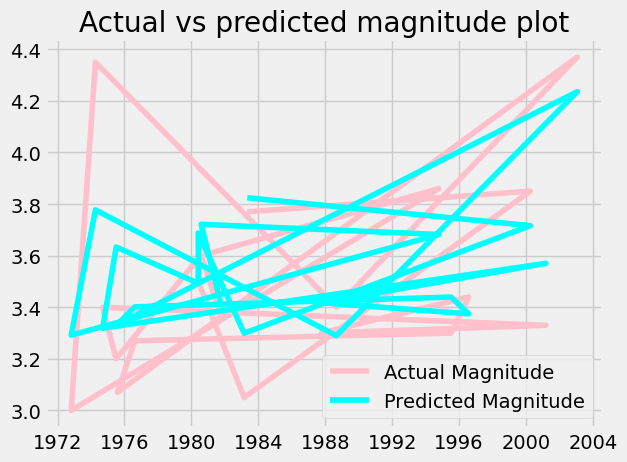

In [50]:
plt.plot(Y_test.index[:20], Y_test[:20], color='pink', label='Actual Magnitude')
plt.plot(Y_test.index[:20], y_pred[:20], color='aqua', label='Predicted Magnitude')
plt.title('Actual vs predicted magnitude plot')
plt.legend()
plt.show()

Concluding the accurate model

In [51]:
scores_df = pd.DataFrame(scores)
display(scores_df)

,Model name,mse,R^2
0,Linear regression,0.187942,0.023514
1,SVM,0.698266,-2.627968
2,Random Forest,0.166437,0.135248


In [54]:
scores_df[scores_df["mse"] == scores_df["mse"].min()]


,Model name,mse,R^2
2,Random Forest,0.166437,0.135248


In [55]:
scores_df[scores_df["R^2"] == scores_df["R^2"].max()]

,Model name,mse,R^2
2,Random Forest,0.166437,0.135248
